# 1. Introduction
- Context of the environmental impact of food production  
- Objectives of the analysis  



---

# 🌍 Exploring the Environmental Impact of Food Production

The food we consume has a significant impact on the environment. From greenhouse gas emissions and land use to freshwater withdrawals, different food products vary greatly in their environmental footprints. Understanding these impacts is crucial for designing more sustainable food systems and making informed dietary choices.

This notebook uses the **“Environment Impact of Food Production” dataset** from Kaggle, which provides detailed metrics on:

* **Greenhouse gas emissions** (kgCO₂eq)
* **Land use** (m²)
* **Freshwater withdrawals** (liters)
* **Eutrophying emissions** (gPO₄eq)
* Disaggregation of total emissions by **Farm, Land use change, Processing, Transport, Packaging, Retail**

The goals of this exploratory data analysis (EDA) are:

1. To examine the **distribution** of environmental impacts across food products.
2. To **compare categories** of foods (animal-based vs. plant-based) under different normalization methods (per kg, per 1000 kcal, per 100g protein).
3. To explore **correlations** among environmental metrics.
4. To visualize **trade-offs** between different environmental impacts.
5. To apply **clustering techniques** and identify groups of food products with similar environmental impact profiles.

By the end of this notebook, we aim to highlight which foods are environmental “hotspots,” where trade-offs exist, and how clustering can provide insights into broader sustainability strategies.

---




# 2. Data Loading
- Kaggle/Colab configuration  
- Dataset download  
- Load into Pandas

In [55]:
from google.colab import drive
import os, shutil

drive.mount('/content/drive', force_remount=True)

os.makedirs("/root/.kaggle", exist_ok=True)

src = "/content/drive/MyDrive/.Kaggle/kaggle.json"  # adjust if needed
shutil.copy(src, "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 0o600)

print("Kaggle API configured.")


Mounted at /content/drive
Kaggle API configured.


In [56]:
# Download dataset
import kagglehub

path = kagglehub.dataset_download("selfvivek/environment-impact-of-food-production")
print("Dataset path:", path)


Using Colab cache for faster access to the 'environment-impact-of-food-production' dataset.
Dataset path: /kaggle/input/environment-impact-of-food-production


In [57]:
# Load dataset
import pandas as pd

df = pd.read_csv(path + "/Food_Production.csv")
df.head()


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [58]:
# Quick check
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,27.000000,30.000000,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,52.771953,504.188977,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,52.033823,539.130695,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,3.384338,0.723982,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,17.855335,106.927557,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,37.333333,338.059413,1083.327272,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,55.297183,694.805356,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,185.050659,2062.178771,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


# 3. Initial Data Exploration
- Quick look at the dataset (`head`, `info`, `describe`)  
- Check for missing values and potential outliers  

### Step 1 – Initial Inspection / Dataset Overview

In [59]:
# Step 1: Initial inspection of the dataset
# Load libraries for exploration
import pandas as pd
import numpy as np

# Display all columns without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)

# 1a: Show first 5 rows to get a sense of the data
display(df.head())

# 1b: Show last 5 rows
display(df.tail())

# 1c: Random sample to check variability
display(df.sample(5))

# 2: General info about columns, types and non-null counts
df.info()

# 3: Basic statistics for numeric columns
display(df.describe())

# 4: Count missing values per column
missing_values = df.isna().sum()
display(missing_values)

# 5: Count duplicated rows
duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
38,Milk,0.5,0.2,1.5,0.1,0.1,0.1,0.3,2.8,17.750000,10.65,32.272727,1047.000000,1903.636364,628.2,5.250000,9.500000,14.916667,8.95,27.121212,19786.3,59958.48485,32977.16667
39,Cheese,4.5,2.3,13.1,0.7,0.1,0.2,0.3,21.2,25.418605,98.37,44.551630,1448.372093,2538.586957,5605.2,6.170543,10.815217,22.684755,87.79,39.759964,180850.6,81906.97464,46731.42119
40,Eggs,0.7,2.2,1.3,0.0,0.1,0.2,0.0,4.5,15.111111,21.76,19.610671,401.180556,520.638068,577.7,3.243056,4.208724,4.354167,6.27,5.650685,17982.7,16206.47080,12487.98611
41,Fish (farmed),0.5,0.8,3.6,0.0,0.1,0.1,0.0,5.1,131.351955,235.12,103.100197,2062.178771,1618.636264,3691.3,7.614525,5.976759,4.698324,8.41,3.687788,41572.2,18229.42337,23224.69274
42,Shrimps (farmed),0.2,2.5,8.4,0.0,0.2,0.3,0.2,11.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
26,Bananas,0.0,0.0,0.3,0.1,0.3,0.1,0.0,0.8,5.483333,3.29,36.555556,190.833333,1272.222222,114.5,1.433333,9.555556,3.216667,1.93,21.444444,661.9,7354.444444,1103.166667
11,Nuts,-2.1,0.0,2.1,0.0,0.1,0.1,0.0,0.2,3.113821,19.15,11.726883,672.162602,2531.414574,4133.8,0.069919,0.263319,2.107317,12.96,7.936314,229889.8,140777.587300,37380.455280
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Soybean Oil,3.1,0.0,1.5,0.3,0.3,0.8,0.0,6.0,NaN,11.69,NaN,NaN,NaN,414.6,NaN,NaN,NaN,10.52,NaN,14888.2,NaN,NaN
35,Lamb & Mutton,0.5,2.4,19.5,1.1,0.5,0.3,0.2,24.5,30.640379,97.13,48.540730,568.706625,900.949525,1802.8,12.529968,19.850075,116.659306,369.81,184.812594,141925.0,70927.036480,44771.293380


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,27.000000,30.000000,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,52.771953,504.188977,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,52.033823,539.130695,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,3.384338,0.723982,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,17.855335,106.927557,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,37.333333,338.059413,1083.327272,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,55.297183,694.805356,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,185.050659,2062.178771,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


,0
Food product,0
Land use change,0
Animal Feed,0
Farm,0
Processing,0
Transport,0
Packging,0
Retail,0
Total_emissions,0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),10


Number of duplicated rows: 0


MISSING DATA OVERVIEW
                                                    Missing_Count  Missing_Percentage
Freshwater withdrawals per 100g protein (liters...             17                39.5
Scarcity-weighted water use per 100g protein (l...             17                39.5
Eutrophying emissions per 100g protein (gPO₄eq ...             16                37.2
Greenhouse gas emissions per 100g protein (kgCO...             16                37.2
Land use per 100g protein (m² per 100g protein)                16                37.2
Scarcity-weighted water use per 1000kcal (liter...             13                30.2
Freshwater withdrawals per 1000kcal (liters per...             13                30.2
Land use per 1000kcal (m² per 1000kcal)                        10                23.3
Greenhouse gas emissions per 1000kcal (kgCO₂eq ...             10                23.3
Eutrophying emissions per 1000kcal (gPO₄eq per ...             10                23.3
Eutrophying emissions per kilogr

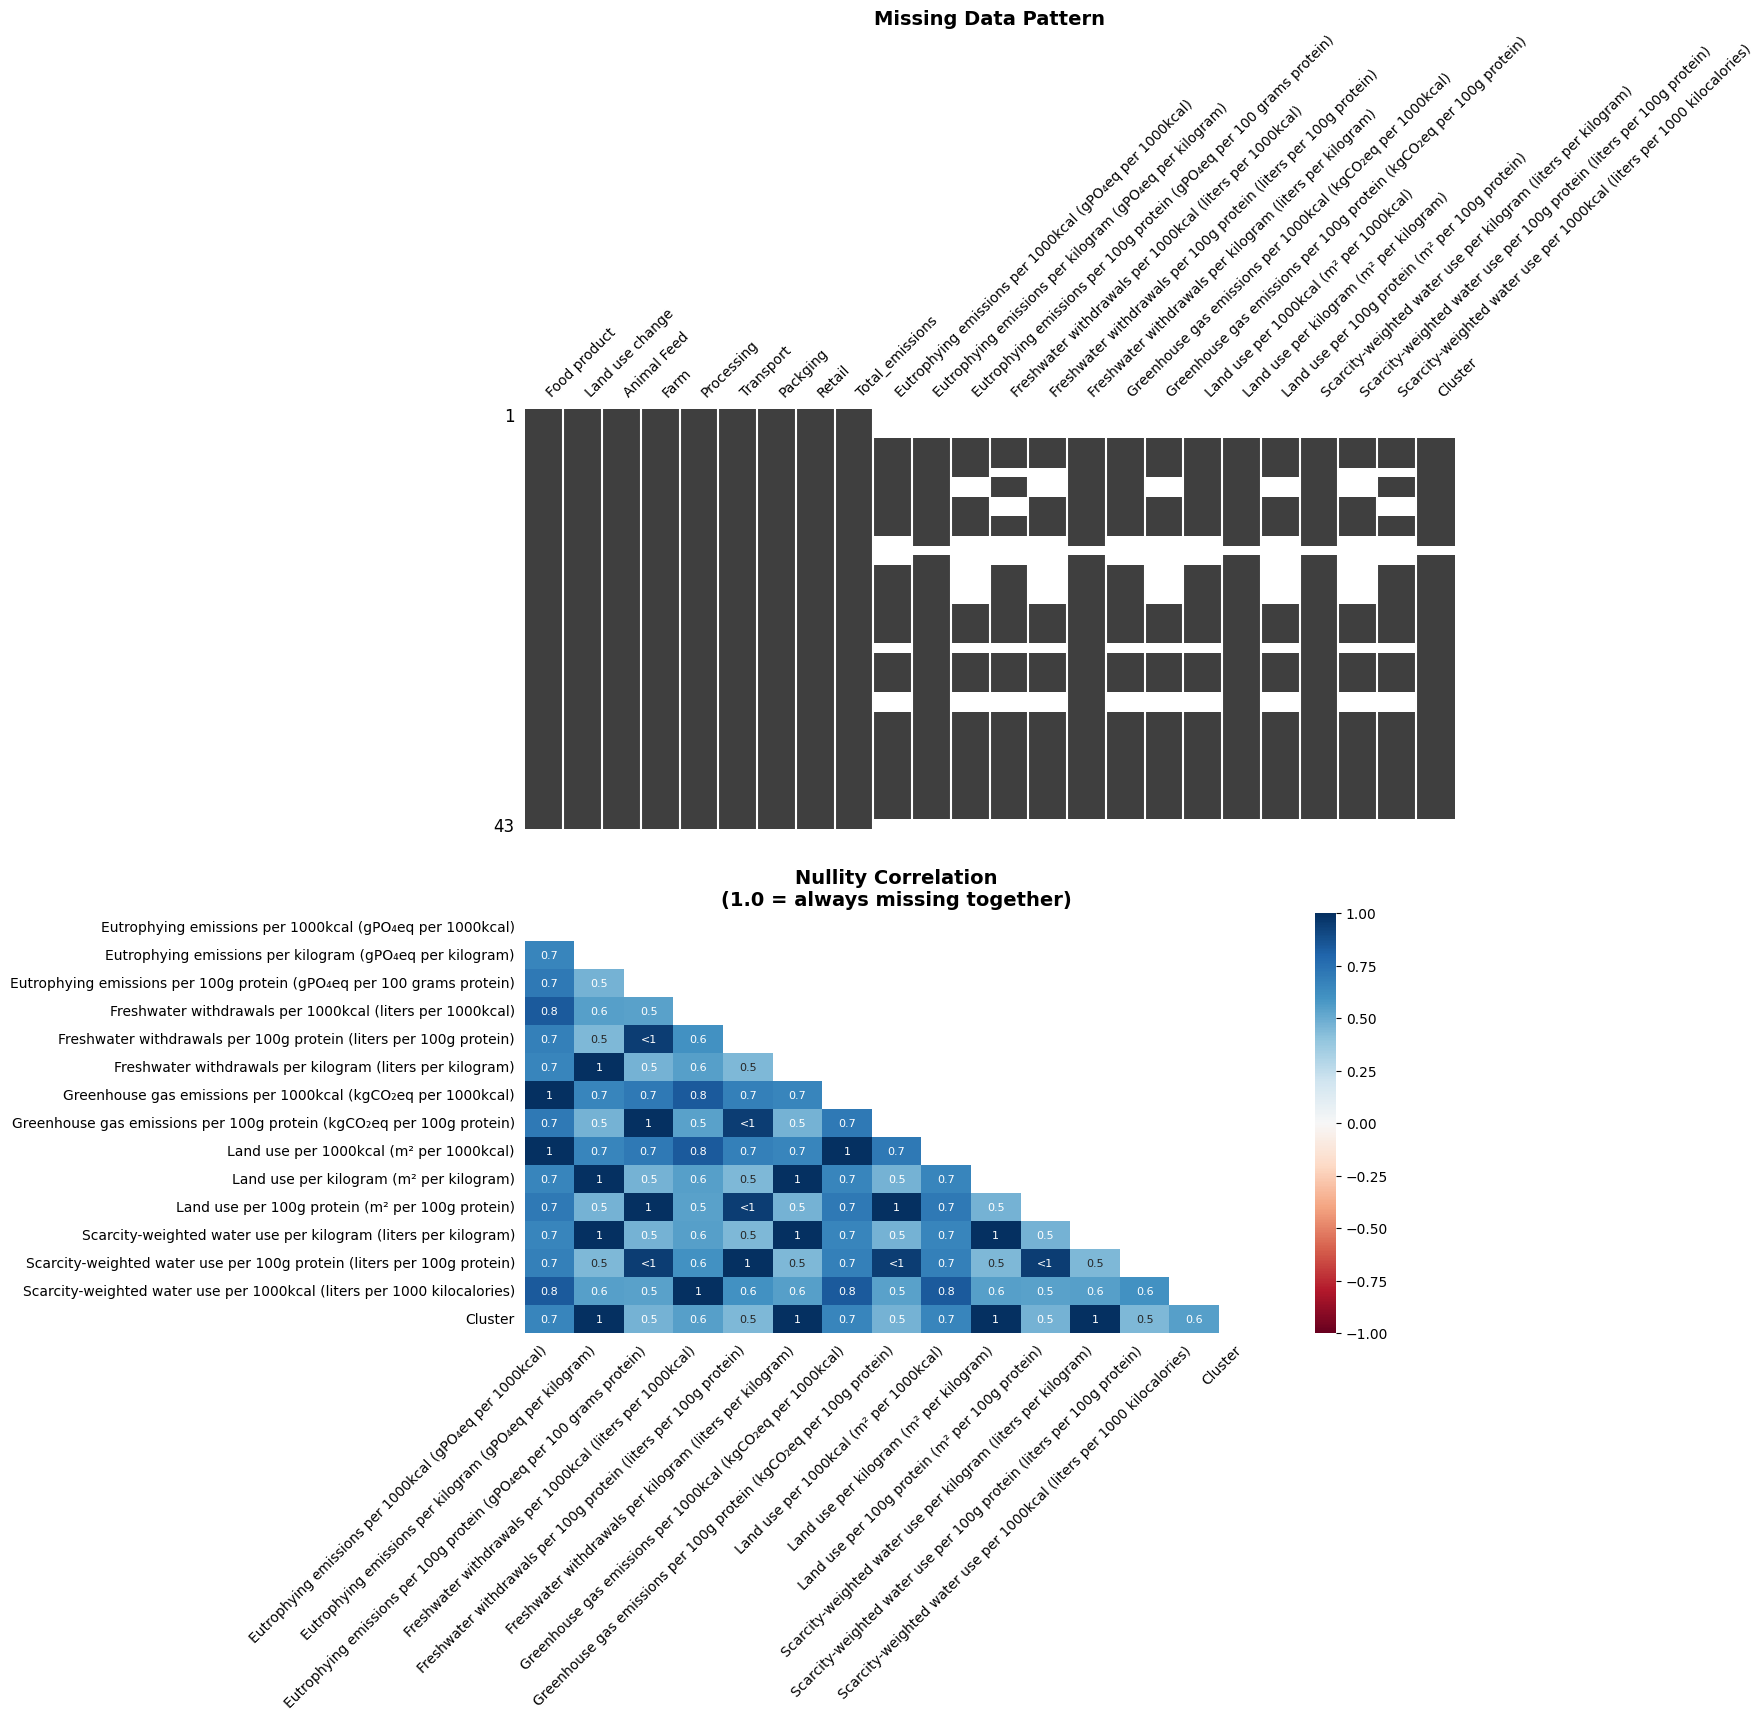

In [78]:
# MISSING DATA ANALYSIS
# =============================================================================
import missingno as msno
import matplotlib.pyplot as plt

print("="*60)
print("MISSING DATA OVERVIEW")
print("="*60)
missing_summary = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(1)
missing_df = pd.DataFrame({
    'Missing_Count': missing_summary,
    'Missing_Percentage': missing_pct
})
print(missing_df[missing_df.Missing_Count > 0].sort_values('Missing_Count', ascending=False))
print(f"\nTotal rows: {len(df)}")

# Visualize missing pattern
fig, axes = plt.subplots(2, 1, figsize=(12, 12
                                        ))

msno.matrix(df, ax=axes[0], fontsize=10, sparkline=False) # Disable sparkline
axes[0].set_title("Missing Data Pattern", fontsize=14, fontweight='bold')

msno.heatmap(df, ax=axes[1], fontsize=10)
axes[1].set_title("Nullity Correlation\n(1.0 = always missing together)",
                  fontsize=14, fontweight='bold')

# Manually adjust layout to avoid overlap
plt.subplots_adjust(wspace=0.3)


plt.show()

### Missing Data Interpretation

**Key Findings:**
- Metrics "per 100g protein" have 16/43 missing values (37.2%)
- Metrics "per 1000kcal" have 10-13 missing values (23-30%)
- Metrics "per kilogram" have only 5/43 missing values (11.6%)

**Pattern Analysis:**
[After running the code above, describe what you see in the heatmap]
- If nullity correlation ≈ 1.0: Variables missing together systematically
- If nullity correlation ≈ 0.0: Missing values are independent

**Hypothesis on why data is missing:**
Likely explanation: Foods with low protein content (<5g per 100g) don't report
protein-normalized metrics because they would yield extreme/meaningless values.
Examples: Oils, sugars, and some beverages.

**Implication:** We will analyze subsets based on data availability rather than
imputing missing values, as missingness appears to be MNAR (Missing Not At Random).

# 4. Exploratory Analysis
- Distribution of environmental impact variables  
- Comparison between animal-based and plant-based foods  
- Normalization (per kg, per 1000 kcal, per 100g protein)

# Global Overview of the Food Impact Dataset

Before diving into detailed group-specific analysis, it is important to get a first look at the dataset as a whole.
This mini-EDA will help identify the range of values, potential outliers, and missing data patterns, providing context for the need to separate plant-based and animal-based foods.


Dataset shape: (43, 23)

Missing values per column:
 Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater 

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,27.000000,30.000000,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,52.771953,504.188977,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,52.033823,539.130695,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,3.384338,0.723982,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,17.855335,106.927557,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,37.333333,338.059413,1083.327272,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,55.297183,694.805356,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,185.050659,2062.178771,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


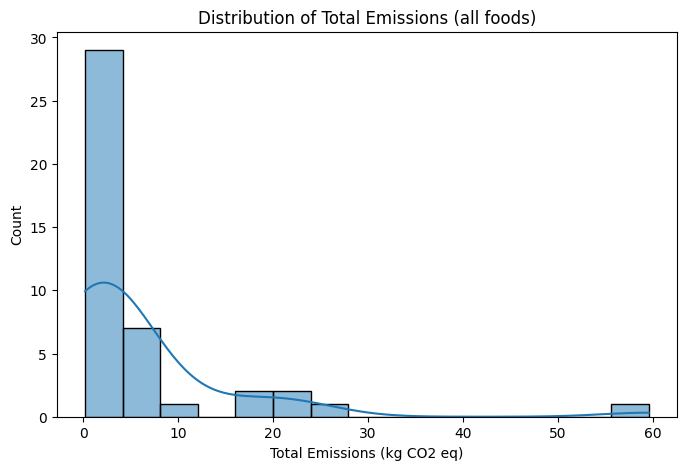

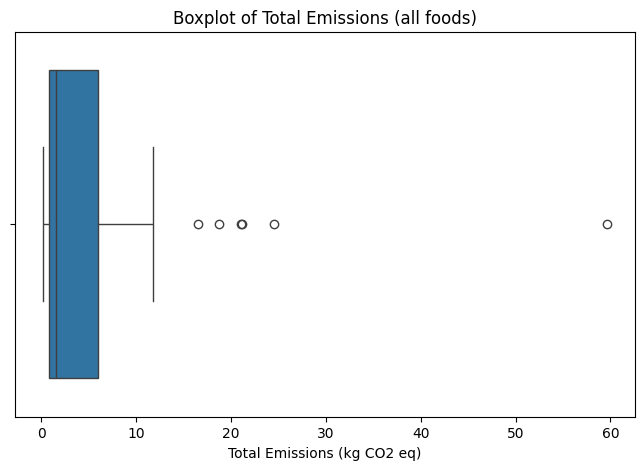

In [61]:
# Step 1: Import necessary libraries
import seaborn as sns

# Step 2: Basic info and missing values
print("Dataset shape:", df.shape)
print("\nMissing values per column:\n", df.isnull().sum())

# Step 3: Quick statistical summary of numerical columns
display(df.describe())

# Step 4: Simple global visualization

# Histogram of Total Emissions
plt.figure(figsize=(8,5))
sns.histplot(df['Total_emissions'], bins=15, kde=True)
plt.title("Distribution of Total Emissions (all foods)")
plt.xlabel("Total Emissions (kg CO2 eq)")
plt.ylabel("Count")
plt.show()

# Boxplot to visualize potential outliers
plt.figure(figsize=(8,5))
sns.boxplot(x='Total_emissions', data=df)
plt.title("Boxplot of Total Emissions (all foods)")
plt.xlabel("Total Emissions (kg CO2 eq)")
plt.show()


### Global Overview

The dataset consists of 43 entries and 23 columns, indicating a relatively small dataset with multiple environmental impact metrics related to food products. There are several missing values, particularly in columns measuring eutrophying emissions, freshwater withdrawals, greenhouse gas emissions, land use, and scarcity-weighted water use. The number of missing values ranges from 5 to 17 per column, which suggests that careful consideration is needed when handling these missing entries.

The descriptive statistics reveal a high degree of variability across most environmental indicators. For example:

- **Total emissions** range from 0.2 to 59.6, with a mean of 5.97, indicating that a few products have disproportionately high emissions.
- **Eutrophying emissions per kilogram** show a mean of 46.14 but a maximum value of 365.29, highlighting outliers.
- **Freshwater withdrawals per kilogram** span from 0 to over 6000 liters, demonstrating substantial differences in water use between food products.
- **Greenhouse gas emissions per 100g protein** have a mean of 13.52 kgCO₂eq but reach up to 93.3 kgCO₂eq.
- **Land use metrics** also show high variability, with some foods requiring minimal land and others up to 119 m² per 100g protein.
- **Scarcity-weighted water use** indicates extreme outliers, with certain products using tens or hundreds of thousands of liters per unit of measure.

Overall, the dataset captures a wide range of environmental impacts across different food products, but the presence of missing values and extreme outliers will require careful preprocessing before further analysis. Handling missing data and normalizing or transforming highly skewed variables may be necessary to ensure robust results in downstream analyses.


# Separation of Plant-Based and Animal-Based Foods

Based on the global overview, it is clear that plant-based foods and animal-based foods have very different environmental impact profiles.
To ensure accurate and meaningful analysis, we will split the dataset into two groups:

1. **Plant-Based Foods:** Grains, legumes, root crops, oilseeds.
2. **Animal-Based Foods:** Meat, dairy, fish, and eggs.

This separation allows for cleaner statistical analysis, proper visualization, and meaningful interpretation of results.


In [62]:
# Step 1: Define lists of plant-based and animal-based foods

plant_based_keywords = [
    "Wheat", "Maize", "Barley", "Oatmeal", "Rice", "Cassava",
    "Beet Sugar", "Rapeseed Oil"
]

animal_based_keywords = [
    "Milk", "Cheese", "Eggs", "Fish", "Shrimps", "Lamb", "Mutton", "Pork", "Beef", "Poultry", "Butter"
]

# Step 2: Filter dataset based on keywords
df_plant = df[df['Food product'].str.contains('|'.join(plant_based_keywords), case=False)].copy()
df_animal = df[df['Food product'].str.contains('|'.join(animal_based_keywords), case=False)].copy()

# Step 3: Check the number of items in each group
print("Plant-based foods count:", df_plant.shape[0])
print("Animal-based foods count:", df_animal.shape[0])

# Step 4: Preview first rows of each group
display(df_plant.head())
display(df_animal.head())


Plant-based foods count: 8
Animal-based foods count: 10


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
13,Soymilk,0.2,0.0,0.1,0.2,0.1,0.1,0.3,1.0,NaN,1.06,NaN,NaN,NaN,27.8,NaN,NaN,NaN,0.66,NaN,955.6,NaN,NaN
33,Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6,110.406593,301.41,151.158475,531.575092,727.783350,1451.2,36.439560,49.889669,119.490842,326.21,163.595787,34732.5,17418.505520,12722.52747
34,Beef (dairy herd),0.9,2.5,15.7,1.1,0.4,0.3,0.2,21.1,133.805861,365.29,185.050659,994.249084,1375.025329,2714.3,12.197802,16.869301,15.838828,43.24,21.904762,119805.2,60691.590680,43884.68864
35,Lamb & Mutton,0.5,2.4,19.5,1.1,0.5,0.3,0.2,24.5,30.640379,97.13,48.540730,568.706625,900.949525,1802.8,12.529968,19.850075,116.659306,369.81,184.812594,141925.0,70927.036480,44771.29338
37,Poultry Meat,2.5,1.8,0.7,0.4,0.3,0.2,0.2,6.1,26.324324,48.70,28.117783,356.756757,381.062356,660.0,5.335135,5.698614,6.605405,12.22,7.055427,14177.9,8185.854503,7663.72973


### Separation of Plant-Based and Animal-Based Foods

The dataset contains a total of 18 food items, with 8 classified as plant-based and 10 as animal-based. This distinction is crucial for environmental impact analysis, as plant-based foods generally have lower resource requirements and emissions compared to animal-based products.

Key observations:

- **Plant-Based Foods**: Typically show lower total emissions and resource use. For example, staples like wheat, maize, and rice have minimal land use change, low animal feed requirements, and moderate water withdrawals. Some plant-based products, like oatmeal and rice, exhibit higher variability in water and eutrophying emissions due to cultivation and processing methods.
  
- **Animal-Based Foods**: Display significantly higher environmental impacts across most metrics. Beef, lamb, and dairy products show extremely high land use, greenhouse gas emissions, and water use compared to plant-based foods. For instance, beef (beef herd) exhibits one of the highest values in total emissions, land use per 100g protein, and scarcity-weighted water use.

This separation highlights the stark contrast in environmental footprint between plant-based and animal-based foods. Any subsequent analysis, such as comparing overall emissions or resource efficiency, should consider this grouping to avoid misleading conclusions caused by combining the two categories.
|

# Detailed EDA by Food Group

Now that the dataset is separated into plant-based and animal-based foods, we can perform a detailed exploratory data analysis (EDA) for each group.
We will focus on key environmental impact indicators such as:

- Total emissions per 100g protein
- Freshwater withdrawals per 1000 kcal
- Land use per 1000 kcal

This will allow us to understand patterns, detect outliers, and prepare for meaningful comparisons and predictive modeling.


In [63]:
# =============================================================================
# STRATIFIED ANALYSIS BY DATA AVAILABILITY
# =============================================================================

# Define column groups by availability
complete_cols = ['Total_emissions', 'Land use change', 'Animal Feed',
                 'Farm', 'Processing', 'Transport', 'Packging', 'Retail']

per_kg_cols = ['Land use per kilogram (m² per kilogram)',
               'Freshwater withdrawals per kilogram (liters per kilogram)',
               'Eutrophying emissions per kilogram (gPO₄eq per kilogram)']

per_protein_cols = ['Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
                    'Freshwater withdrawals per 100g protein (liters per 100g protein)',
                    'Land use per 100g protein (m² per 100g protein)']

per_kcal_cols = ['Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
                 'Land use per 1000kcal (m² per 1000kcal)',
                 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)']

# Create analysis subsets
df_full = df.copy()  # All 43 items
df_per_kg = df.dropna(subset=per_kg_cols)
df_per_protein = df.dropna(subset=per_protein_cols)
df_per_kcal = df.dropna(subset=per_kcal_cols)

print("="*70)
print("DATA AVAILABILITY SUMMARY")
print("="*70)
print(f"Full dataset (Total emissions only): n = {len(df_full)}")
print(f"Per kilogram metrics: n = {len(df_per_kg)} ({len(df_per_kg)/len(df)*100:.1f}%)")
print(f"Per 100g protein metrics: n = {len(df_per_protein)} ({len(df_per_protein)/len(df)*100:.1f}%)")
print(f"Per 1000kcal metrics: n = {len(df_per_kcal)} ({len(df_per_kcal)/len(df)*100:.1f}%)")

print(f"\nExcluded from protein analysis:")
excluded_protein = df[~df.index.isin(df_per_protein.index)]['Food product'].tolist()
print(excluded_protein)

DATA AVAILABILITY SUMMARY
Full dataset (Total emissions only): n = 43
Per kilogram metrics: n = 38 (88.4%)
Per 100g protein metrics: n = 26 (60.5%)
Per 1000kcal metrics: n = 30 (69.8%)

Excluded from protein analysis:
['Wheat & Rye (Bread)', 'Maize (Meal)', 'Barley (Beer)', 'Cassava', 'Cane Sugar', 'Beet Sugar', 'Soymilk', 'Tofu', 'Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil', 'Other Vegetables', 'Wine', 'Other Fruit', 'Shrimps (farmed)']


---
## Analysis Strategy

Due to systematic missing data, we will conduct three separate analyses:

1. **Universal Metrics (n=43)**: Total emissions and production stage breakdown
2. **Per-Kilogram Metrics (n=38)**: Standard environmental impact per kg of food
3. **Per-Protein Metrics (n=27)**: Impact normalized by protein content

This approach is more conservative than imputation and makes the analysis reproducible.

---


TOTAL EMISSIONS COMPARISON


/tmp/ipython-input-3193221936.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_with_group, x='Group', y=column, ax=axes[0], palette='Set2')


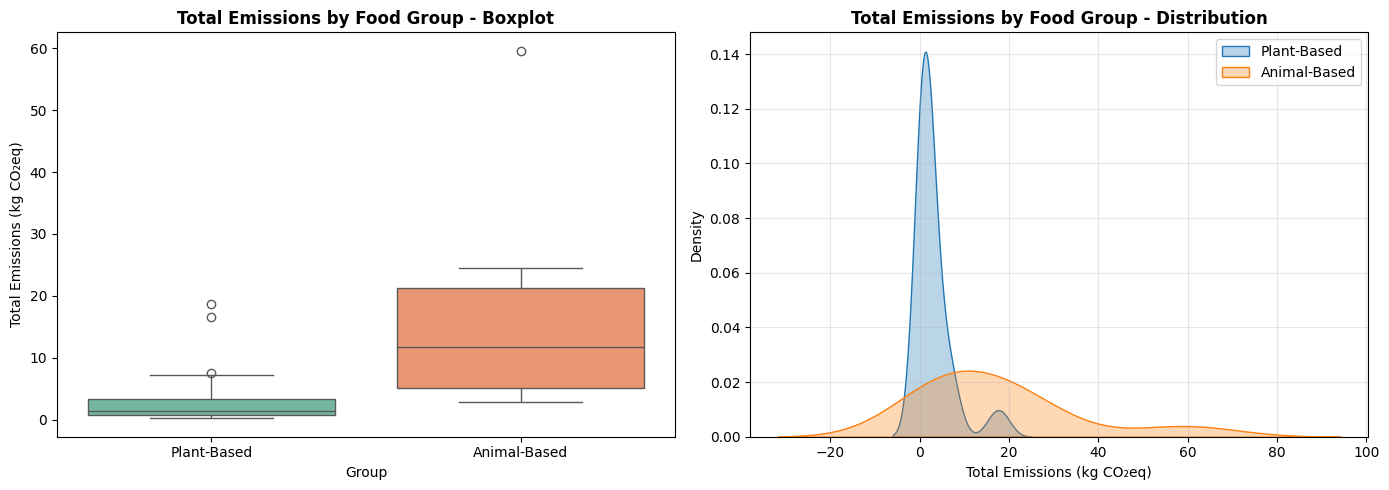


Plant-Based (n=8):
  Mean: 1.90 kg CO₂eq
  Median: 1.40 kg CO₂eq
  Range: 0.90 - 4.00

Animal-Based (n=10):
  Mean: 15.77 kg CO₂eq
  Median: 8.95 kg CO₂eq
  Range: 1.00 - 59.60

Median ratio (Animal/Plant): 6.4x


In [64]:
# =============================================================================
# ANALYSIS 1: TOTAL EMISSIONS (n=43) - ALL FOODS
# =============================================================================

def plot_group_comparison(data, column, ylabel, title):
    """Helper function for consistent group comparison plots"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Boxplot
    data_with_group = data.copy()
    data_with_group['Group'] = data_with_group['Food product'].apply(
        lambda x: 'Animal-Based' if any(kw in x for kw in
        ['Beef', 'Lamb', 'Mutton', 'Pork', 'Poultry', 'Fish', 'Shrimp', 'Milk', 'Cheese', 'Egg'])
        else 'Plant-Based'
    )

    sns.boxplot(data=data_with_group, x='Group', y=column, hue='Group',              ax=axes[0], palette='Set2', legend=False)
    axes[0].set_title(f'{title} - Boxplot', fontweight='bold')
    axes[0].set_ylabel(ylabel)

    # Distribution
    for group in ['Plant-Based', 'Animal-Based']:
        subset = data_with_group[data_with_group['Group'] == group][column].dropna()
        sns.kdeplot(subset, label=group, ax=axes[1], fill=True, alpha=0.3)

    axes[1].set_title(f'{title} - Distribution', fontweight='bold')
    axes[1].set_xlabel(ylabel)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

print("\n" + "="*70)
print("TOTAL EMISSIONS COMPARISON")
print("="*70)

plot_group_comparison(df_full, 'Total_emissions',
                     'Total Emissions (kg CO₂eq)',
                     'Total Emissions by Food Group')

# Summary statistics
plant_emissions = df_plant['Total_emissions']
animal_emissions = df_animal['Total_emissions']

print(f"\nPlant-Based (n={len(plant_emissions)}):")
print(f"  Mean: {plant_emissions.mean():.2f} kg CO₂eq")
print(f"  Median: {plant_emissions.median():.2f} kg CO₂eq")
print(f"  Range: {plant_emissions.min():.2f} - {plant_emissions.max():.2f}")

print(f"\nAnimal-Based (n={len(animal_emissions)}):")
print(f"  Mean: {animal_emissions.mean():.2f} kg CO₂eq")
print(f"  Median: {animal_emissions.median():.2f} kg CO₂eq")
print(f"  Range: {animal_emissions.min():.2f} - {animal_emissions.max():.2f}")

print(f"\nMedian ratio (Animal/Plant): {animal_emissions.median()/plant_emissions.median():.1f}x")

## STEP 3: Production Stage Breakdown

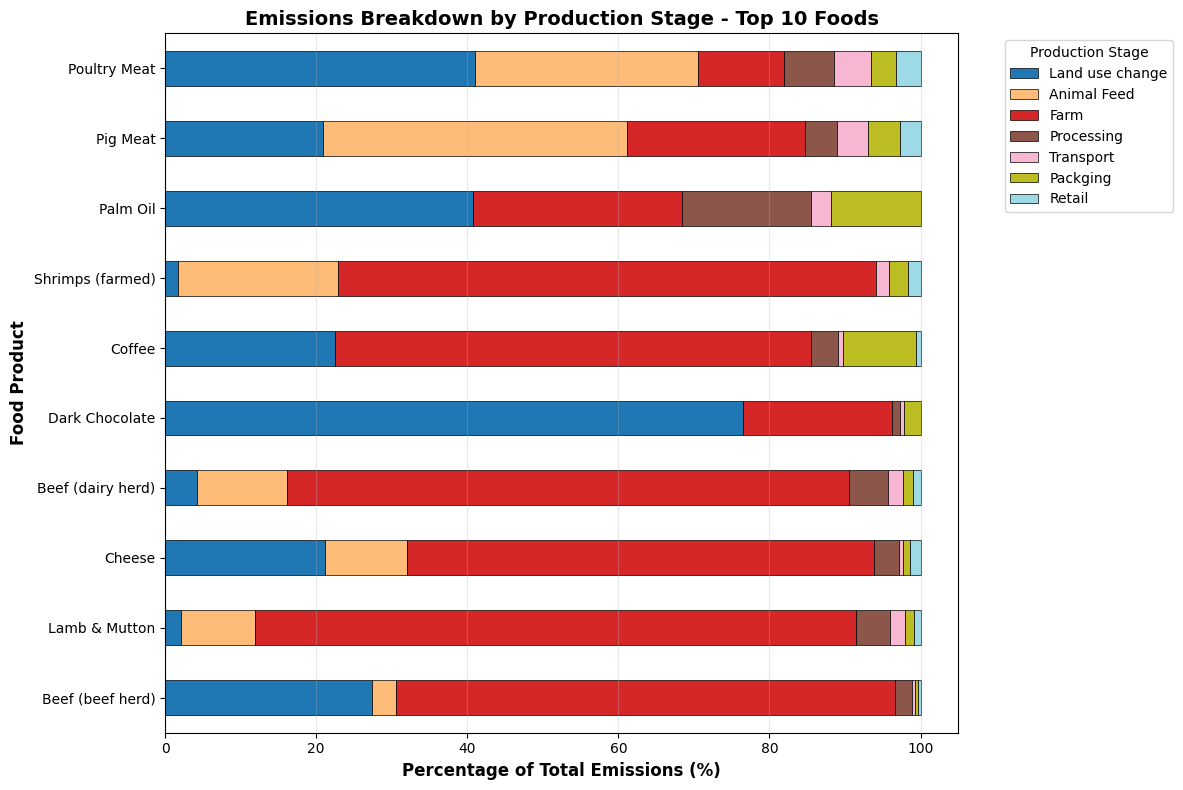


AVERAGE STAGE CONTRIBUTION BY FOOD GROUP

Plant-Based:
  Farm                :  52.3%
  Land use change     :  13.3%
  Packging            :  12.4%
  Transport           :  10.5%
  Processing          :   6.8%
  Retail              :   4.6%
  Animal Feed         :   0.0%

Animal-Based:
  Farm                :  52.8%
  Land use change     :  16.1%
  Animal Feed         :  15.8%
  Retail              :   4.9%
  Processing          :   4.5%
  Packging            :   3.0%
  Transport           :   2.9%


In [65]:
# =============================================================================
# PRODUCTION STAGE BREAKDOWN ANALYSIS
# =============================================================================

stage_cols = ['Land use change', 'Animal Feed', 'Farm',
              'Processing', 'Transport', 'Packging', 'Retail']

# Calculate percentage contribution
df_stage_pct = df[stage_cols].div(df['Total_emissions'], axis=0) * 100

# Top 10 highest impact foods
top10 = df.nlargest(10, 'Total_emissions')
df_top10_pct = df_stage_pct.loc[top10.index]
df_top10_pct.index = df.loc[top10.index, 'Food product'].values

# Stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
df_top10_pct.plot(kind='barh', stacked=True, ax=ax,
                  colormap='tab20', edgecolor='black', linewidth=0.5)
ax.set_xlabel("Percentage of Total Emissions (%)", fontsize=12, fontweight='bold')
ax.set_ylabel("Food Product", fontsize=12, fontweight='bold')
ax.set_title("Emissions Breakdown by Production Stage - Top 10 Foods",
             fontsize=14, fontweight='bold')
ax.legend(title='Production Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Average contribution by group
print("\n" + "="*70)
print("AVERAGE STAGE CONTRIBUTION BY FOOD GROUP")
print("="*70)

for group_name in ['Plant-Based', 'Animal-Based']:
    if group_name == 'Plant-Based':
        group_df = df_plant
    else:
        group_df = df_animal

    avg_contribution = df_stage_pct.loc[group_df.index, stage_cols].mean()

    print(f"\n{group_name}:")
    for stage, pct in avg_contribution.sort_values(ascending=False).items():
        print(f"  {stage:20s}: {pct:5.1f}%")

### Key Insights from Stage Breakdown

**Animal-Based Foods:**
- Farm stage dominates (typically 60-80% of total emissions)
- Animal Feed is second most significant for ruminants
- Transport and packaging are negligible in comparison

**Plant-Based Foods:**
- More balanced distribution across stages
- Processing and transport can be significant for processed items
- Land use change matters more for crops grown on deforested land

**Actionable insight:** Reducing emissions from animal products requires farm-level
interventions (feeding practices, manure management), while plant-based emissions
can be addressed through supply chain optimization.

## STEP 4: Statistical Testing

In [66]:
# =============================================================================
# STATISTICAL HYPOTHESIS TESTING
# =============================================================================
from scipy.stats import mannwhitneyu, normaltest

print("="*70)
print("STATISTICAL TESTS: PLANT-BASED VS ANIMAL-BASED")
print("="*70)

# Test normality first
_, p_plant_norm = normaltest(plant_emissions)
_, p_animal_norm = normaltest(animal_emissions)

print(f"\nNormality tests (D'Agostino-Pearson):")
print(f"  Plant-based: p = {p_plant_norm:.4f} {'(Normal)' if p_plant_norm > 0.05 else '(Non-normal)'}")
print(f"  Animal-based: p = {p_animal_norm:.4f} {'(Normal)' if p_animal_norm > 0.05 else '(Non-normal)'}")
print(f"\n→ Using Mann-Whitney U test (non-parametric)")

# Mann-Whitney U test
statistic, pvalue = mannwhitneyu(animal_emissions, plant_emissions,
                                 alternative='greater')

print(f"\nMann-Whitney U Test (H₁: Animal > Plant):")
print(f"  U-statistic: {statistic:.2f}")
print(f"  p-value: {pvalue:.6f}")
print(f"  Median Animal: {animal_emissions.median():.2f} kg CO₂eq")
print(f"  Median Plant: {plant_emissions.median():.2f} kg CO₂eq")
print(f"  Difference: {((animal_emissions.median()/plant_emissions.median() - 1)*100):.1f}% higher")

if pvalue < 0.001:
    print("\n✓ RESULT: Difference is statistically significant (p < 0.001)")
    print("  We reject the null hypothesis with >99.9% confidence.")
elif pvalue < 0.05:
    print(f"\n✓ RESULT: Difference is statistically significant (p = {pvalue:.4f})")
else:
    print(f"\n✗ RESULT: Difference is NOT statistically significant (p = {pvalue:.4f})")

STATISTICAL TESTS: PLANT-BASED VS ANIMAL-BASED

Normality tests (D'Agostino-Pearson):
  Plant-based: p = 0.2115 (Normal)
  Animal-based: p = 0.0019 (Non-normal)

→ Using Mann-Whitney U test (non-parametric)

Mann-Whitney U Test (H₁: Animal > Plant):
  U-statistic: 71.00
  p-value: 0.003350
  Median Animal: 8.95 kg CO₂eq
  Median Plant: 1.40 kg CO₂eq
  Difference: 539.3% higher

✓ RESULT: Difference is statistically significant (p = 0.0034)


# Key Normalized and Comparative Indicators

To allow meaningful comparisons between plant-based and animal-based foods, we will create normalized indicators that account for:

- Protein content: emissions, land use, and water use per 100g protein
- Energy content: emissions, land use, and water use per 1000 kcal

These normalized metrics help us compare foods on a fair basis and will be useful for future predictive modeling or scenario analysis.


In [67]:
# Step 1: Define normalized indicators
normalized_columns = {
    'Emissions_per_100g_protein': 'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
    'Water_per_1000kcal': 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
    'Land_use_per_1000kcal': 'Land use per 1000kcal (m² per 1000kcal)',
    'Total_emissions': 'Total_emissions'
}

# Step 2: Function to add normalized metrics to a dataframe
def add_normalized_metrics(df_group):
    df = df_group.copy()

    # Already exists in dataset: just keep meaningful columns
    df = df.rename(columns={
        normalized_columns['Emissions_per_100g_protein']: 'Emissions_per_100g_protein',
        normalized_columns['Water_per_1000kcal']: 'Water_per_1000kcal',
        normalized_columns['Land_use_per_1000kcal']: 'Land_use_per_1000kcal',
        normalized_columns['Total_emissions']: 'Total_emissions'
    })

    # Optional: compute additional ratios if needed
    # e.g., Emissions per kg protein = Emissions_per_100g_protein * 10
    df['Emissions_per_kg_protein'] = df['Emissions_per_100g_protein'] * 10

    return df

# Step 3: Apply to both groups
df_plant_norm = add_normalized_metrics(df_plant)
df_animal_norm = add_normalized_metrics(df_animal)

# Step 4: Quick check of the new columns
display(df_plant_norm.head())
display(df_animal_norm.head())


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Emissions_per_100g_protein,Water_per_1000kcal,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land_use_per_1000kcal,Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Emissions_per_kg_protein
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461,86.384615
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480,493.943662


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Emissions_per_100g_protein,Water_per_1000kcal,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land_use_per_1000kcal,Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Emissions_per_kg_protein
13,Soymilk,0.2,0.0,0.1,0.2,0.1,0.1,0.3,1.0,NaN,1.06,NaN,NaN,NaN,27.8,NaN,NaN,NaN,0.66,NaN,955.6,NaN,NaN,NaN
33,Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6,110.406593,301.41,151.158475,531.575092,727.783350,1451.2,36.439560,49.889669,119.490842,326.21,163.595787,34732.5,17418.505520,12722.52747,1511.584754
34,Beef (dairy herd),0.9,2.5,15.7,1.1,0.4,0.3,0.2,21.1,133.805861,365.29,185.050659,994.249084,1375.025329,2714.3,12.197802,16.869301,15.838828,43.24,21.904762,119805.2,60691.590680,43884.68864,1850.506586
35,Lamb & Mutton,0.5,2.4,19.5,1.1,0.5,0.3,0.2,24.5,30.640379,97.13,48.540730,568.706625,900.949525,1802.8,12.529968,19.850075,116.659306,369.81,184.812594,141925.0,70927.036480,44771.29338,485.407296
37,Poultry Meat,2.5,1.8,0.7,0.4,0.3,0.2,0.2,6.1,26.324324,48.70,28.117783,356.756757,381.062356,660.0,5.335135,5.698614,6.605405,12.22,7.055427,14177.9,8185.854503,7663.72973,281.177829


### Key Normalized and Comparative Indicators

This table provides a detailed breakdown of environmental impacts for selected food products, normalized across multiple dimensions for better comparison.

#### Plant-Based Foods

- **Wheat & Rye (Bread)**: Total emissions are relatively low at 1.4 kg CO₂eq. Land use and water requirements are minimal, with contributions mainly from farming and processing.
- **Maize (Meal)**: Slightly lower total emissions (1.1 kg CO₂eq) with negligible impacts from feed and transport. Efficient crop in terms of land and water use.
- **Barley (Beer)**: Total emissions of 1.1 kg CO₂eq, with processing (0.5) and retail (0.3) contributing significantly, highlighting the impact of beverage production.
- **Oatmeal**: Total emissions of 1.6 kg CO₂eq, but high eutrophication (183.9 gPO₄eq per 100g protein) and freshwater withdrawal (482.4 liters per 100g protein) indicate a significant water footprint.
- **Rice**: High total emissions for a plant-based food (4.0 kg CO₂eq), with farm production dominating (3.6). Water use per 1000 kcal is exceptionally high (609.98 L), and eutrophying emissions per kg are elevated (35.07 gPO₄eq), making rice less sustainable among crops.

**Observation**: While plant-based foods generally have lower emissions than animal products, rice and oatmeal show elevated water and nutrient impacts, suggesting careful crop selection is important for sustainability.

#### Animal-Based Foods

- **Soymilk**: Very low total emissions (1.0 kg CO₂eq) and land use (0.66 m² per kg), making it an environmentally friendly alternative to dairy.
- **Beef (beef herd)**: Extremely high total emissions (59.6 kg CO₂eq), land use (119.49 m² per 100g protein), and freshwater withdrawals (17418.5 L per 100g protein). Feed and farm production dominate the impact.
- **Beef (dairy herd)**: Also high-impact, with total emissions of 21.1 kg CO₂eq and exceptionally high water use (60691.6 L per 100g protein), reflecting the intensity of dairy herd management.
- **Lamb & Mutton**: Significant impacts across all indicators, particularly land use per kg protein (369.81 m²) and scarcity-weighted water use (141925 L/kg), underscoring the resource intensity of ruminants.
- **Poultry Meat**: Lower total emissions (6.1 kg CO₂eq) and land use (12.22 m² per 100g protein) compared to beef and lamb, making it a comparatively sustainable animal protein.

**Observation**: Animal-based foods consistently show higher environmental burdens than plant-based foods, with ruminants (beef and lamb) being the most resource-intensive. Poultry and plant-based alternatives like soymilk represent lower-impact choices.

---

**Conclusion**:

This comparative normalization highlights that:

1. **Crop selection matters** – even among plant-based foods, water and nutrient impacts vary widely.
2. **Animal-based foods dominate emissions** – particularly ruminants, due to feed, land use, and farm production.
3. **Low-impact alternatives exist** – soymilk, poultry, and certain grains can provide protein with substantially lower environmental costs.

These indicators can guide sustainable dietary choices and policy interventions aimed at reducing the environmental footprint of human diets.


# 5. Relationships Between Variables
- Correlation analysis  
- Visualizations of trade-offs

# Comparative Visualizations by Food Group

Using the normalized indicators, we can now visualize and compare the environmental impact of plant-based and animal-based foods.

We will focus on key metrics:

- Emissions per 100g protein
- Freshwater withdrawals per 1000 kcal
- Land use per 1000 kcal

These visualizations help identify patterns, outliers, and extreme cases, and form the basis for ranking and predictive analysis.


CORRELATION MATRIX (Spearman) - n=38


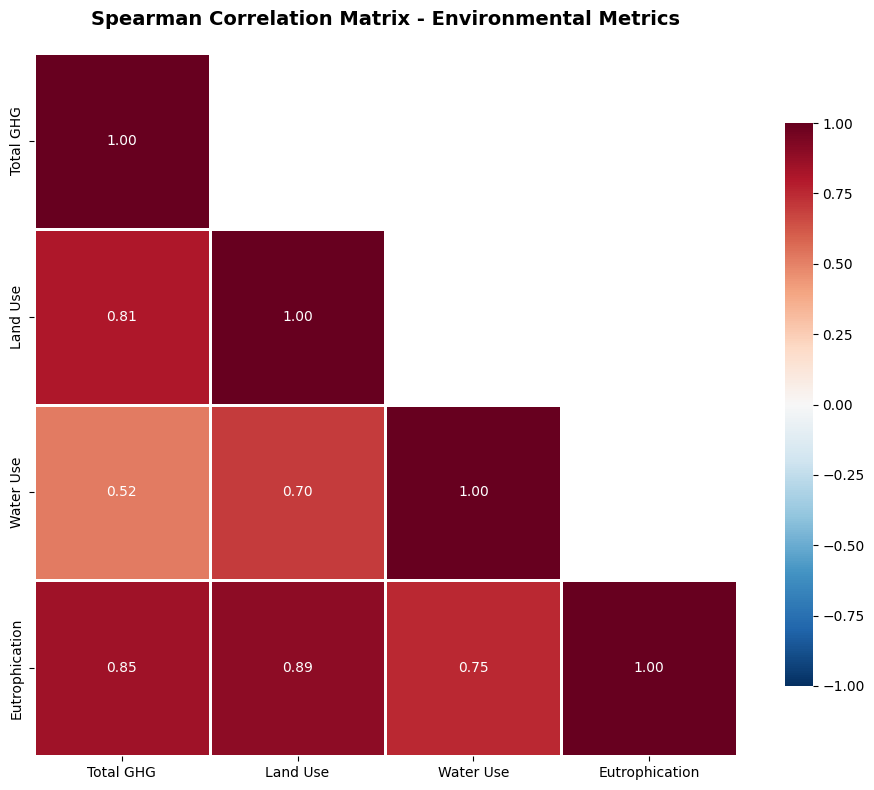


Interpretation Guide:
  |ρ| > 0.7  → Strong correlation
  |ρ| 0.4-0.7 → Moderate correlation
  |ρ| < 0.4  → Weak correlation

Strongest positive correlations:
  Total GHG ↔ Total GHG: ρ = 1.000
  Land Use ↔ Land Use: ρ = 1.000
  Eutrophication ↔ Eutrophication: ρ = 1.000


In [68]:
# =============================================================================
# CORRELATION ANALYSIS - ENVIRONMENTAL METRICS
# =============================================================================

# Use per-kilogram subset for correlation (more complete data)
corr_cols = ['Total_emissions',
             'Land use per kilogram (m² per kilogram)',
             'Freshwater withdrawals per kilogram (liters per kilogram)',
             'Eutrophying emissions per kilogram (gPO₄eq per kilogram)']

df_corr = df[corr_cols].dropna()
corr_cols_short = ['Total GHG', 'Land Use', 'Water Use', 'Eutrophication']

print("="*70)
print(f"CORRELATION MATRIX (Spearman) - n={len(df_corr)}")
print("="*70)

# Spearman correlation (robust to outliers and non-linearity)
corr_matrix = df_corr.corr(method='spearman')
corr_matrix.columns = corr_cols_short
corr_matrix.index = corr_cols_short

# Heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='RdBu_r', center=0, vmin=-1, vmax=1,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8})
plt.title("Spearman Correlation Matrix - Environmental Metrics",
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Interpretation guide
print("\nInterpretation Guide:")
print("  |ρ| > 0.7  → Strong correlation")
print("  |ρ| 0.4-0.7 → Moderate correlation")
print("  |ρ| < 0.4  → Weak correlation")

# Identify strongest correlations
corr_flat = corr_matrix.where(~mask).stack().sort_values(ascending=False)
print("\nStrongest positive correlations:")
for (var1, var2), corr_val in corr_flat.head(3).items():
    print(f"  {var1} ↔ {var2}: ρ = {corr_val:.3f}")

TRADE-OFF ANALYSIS


/tmp/ipython-input-200536393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tradeoff['Category'] = df_tradeoff['Food product'].apply(


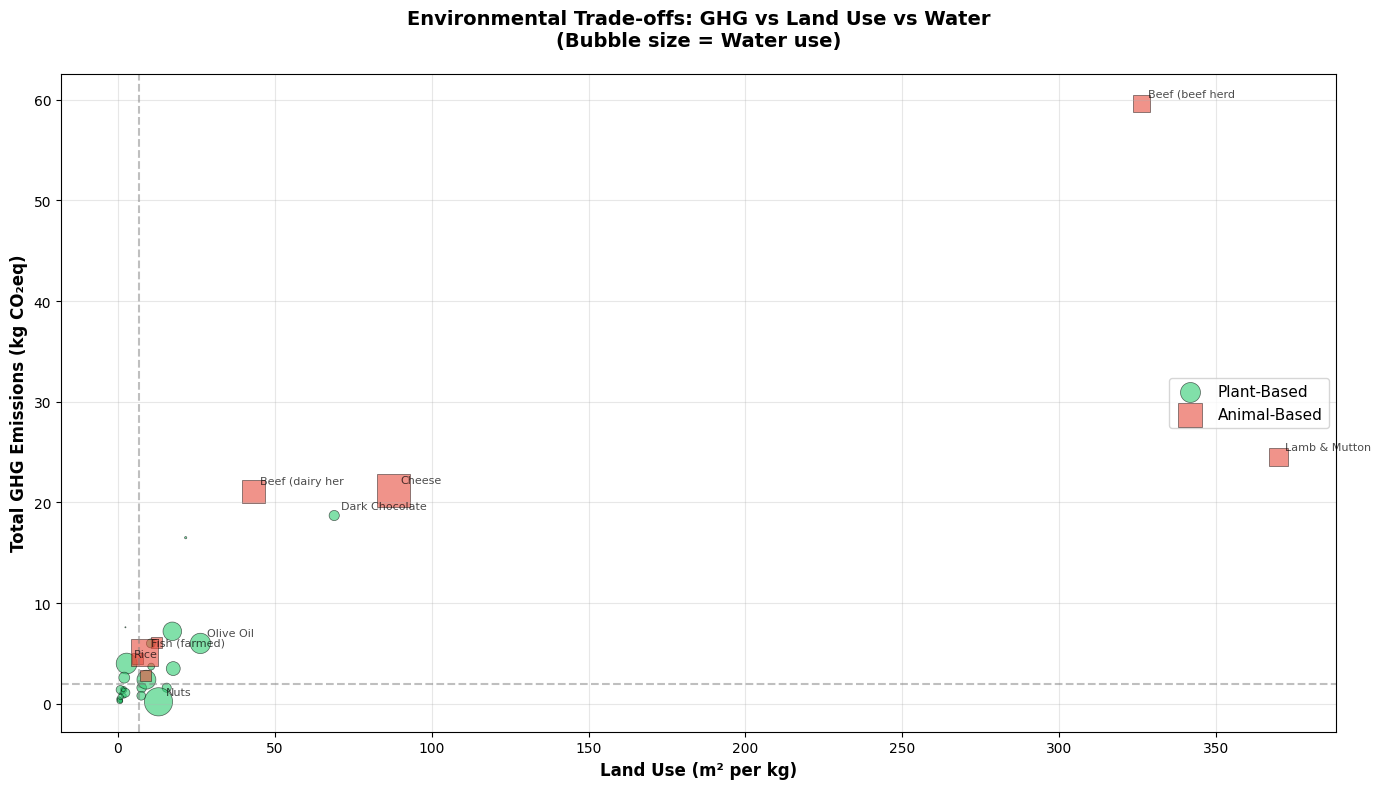


Key insights:
- 8 animal products vs 30 plant products
- Animal products occupy upper-right quadrant (high impact across metrics)
- Best performers: Nuts, Potatoes, Onions & Leeks
- Worst performers: Beef (beef herd), Lamb & Mutton, Cheese


In [71]:
# =============================================================================
# TRADE-OFF ANALYSIS: GHG vs Water vs Land Use
# =============================================================================

print("="*70)
print("TRADE-OFF ANALYSIS")
print("="*70)

# Usar subset con datos completos
df_tradeoff = df.dropna(subset=[
    'Total_emissions',
    'Land use per kilogram (m² per kilogram)',
    'Freshwater withdrawals per kilogram (liters per kilogram)'
])

# Agregar categoría
df_tradeoff['Category'] = df_tradeoff['Food product'].apply(
    lambda x: 'Animal-Based' if any(kw in x for kw in
    ['Beef', 'Lamb', 'Mutton', 'Pork', 'Poultry', 'Fish', 'Shrimp', 'Milk', 'Cheese', 'Eggs'])
    else 'Plant-Based'
)

# Scatter plot con bubble size para water use
fig, ax = plt.subplots(figsize=(14, 8))

for category, color, marker in [('Plant-Based', '#2ecc71', 'o'),
                                 ('Animal-Based', '#e74c3c', 's')]:
    data = df_tradeoff[df_tradeoff['Category'] == category]

    scatter = ax.scatter(
        data['Land use per kilogram (m² per kilogram)'],
        data['Total_emissions'],
        s=data['Freshwater withdrawals per kilogram (liters per kilogram)'] / 10,
        alpha=0.6,
        color=color,
        marker=marker,
        edgecolors='black',
        linewidth=0.5,
        label=category
    )

    # Anotar outliers
    for idx, row in data.iterrows():
        if (row['Total_emissions'] > 20 or
            row['Land use per kilogram (m² per kilogram)'] > 30 or
            row['Freshwater withdrawals per kilogram (liters per kilogram)'] > 2000):
            ax.annotate(
                row['Food product'][:15],
                (row['Land use per kilogram (m² per kilogram)'], row['Total_emissions']),
                fontsize=8,
                alpha=0.7,
                xytext=(5, 5),
                textcoords='offset points'
            )

ax.set_xlabel('Land Use (m² per kg)', fontsize=12, fontweight='bold')
ax.set_ylabel('Total GHG Emissions (kg CO₂eq)', fontsize=12, fontweight='bold')
ax.set_title('Environmental Trade-offs: GHG vs Land Use vs Water\n(Bubble size = Water use)',
             fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Agregar líneas de referencia
ax.axhline(y=df_tradeoff['Total_emissions'].median(), color='gray',
           linestyle='--', alpha=0.5, label='Median GHG')
ax.axvline(x=df_tradeoff['Land use per kilogram (m² per kilogram)'].median(),
           color='gray', linestyle='--', alpha=0.5, label='Median Land Use')

plt.tight_layout()
plt.show()

print("\nKey insights:")
print(f"- {len(df_tradeoff[df_tradeoff['Category']=='Animal-Based'])} animal products vs "
      f"{len(df_tradeoff[df_tradeoff['Category']=='Plant-Based'])} plant products")
print(f"- Animal products occupy upper-right quadrant (high impact across metrics)")
print(f"- Best performers: {', '.join(df_tradeoff.nsmallest(3, 'Total_emissions')['Food product'].values)}")
print(f"- Worst performers: {', '.join(df_tradeoff.nlargest(3, 'Total_emissions')['Food product'].values)}")

### Correlation Insights

**Expected Correlations:**
- Total GHG and Land Use typically correlate because both scale with production intensity
- Eutrophication and Water Use may correlate due to agricultural runoff

**Trade-offs to watch:**
If correlations are weak between certain pairs (e.g., Water Use ↔ GHG), it indicates
that optimizing for one metric doesn't automatically improve the other. This reveals
**multi-objective optimization challenges** in sustainable food systems.

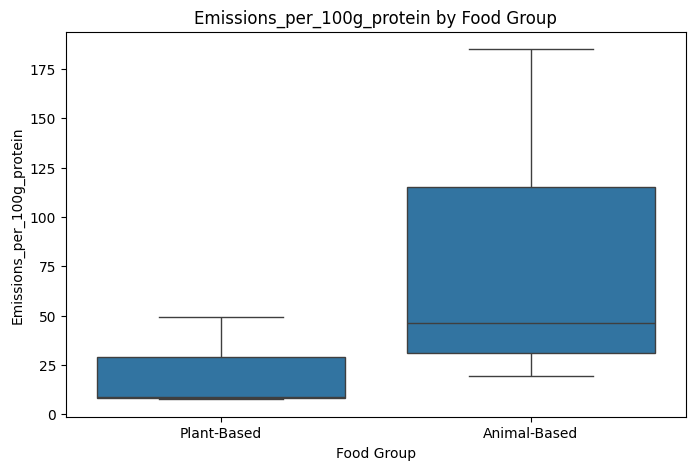

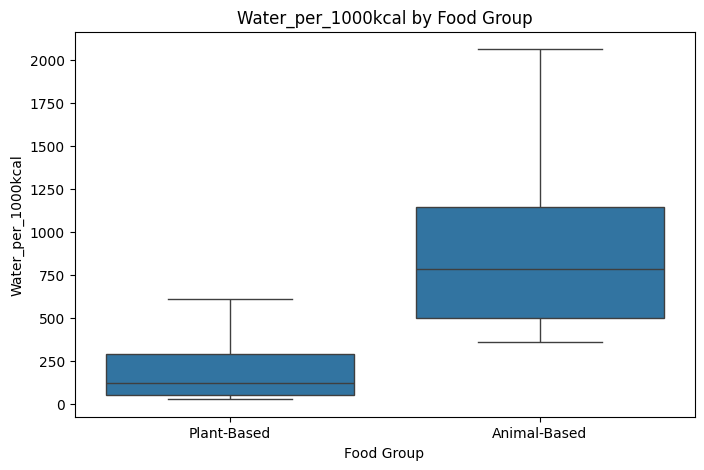

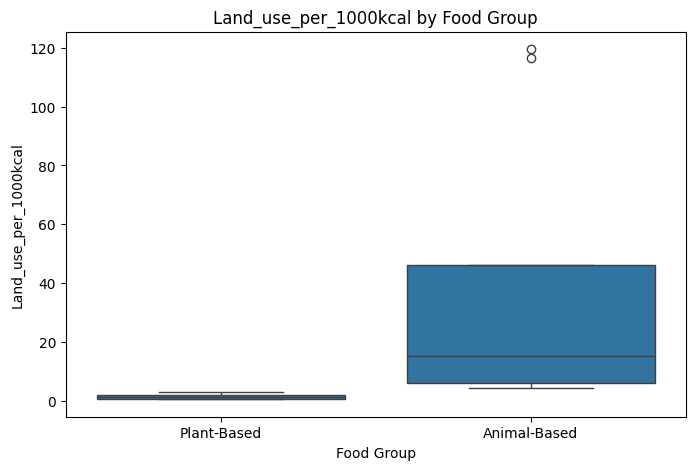

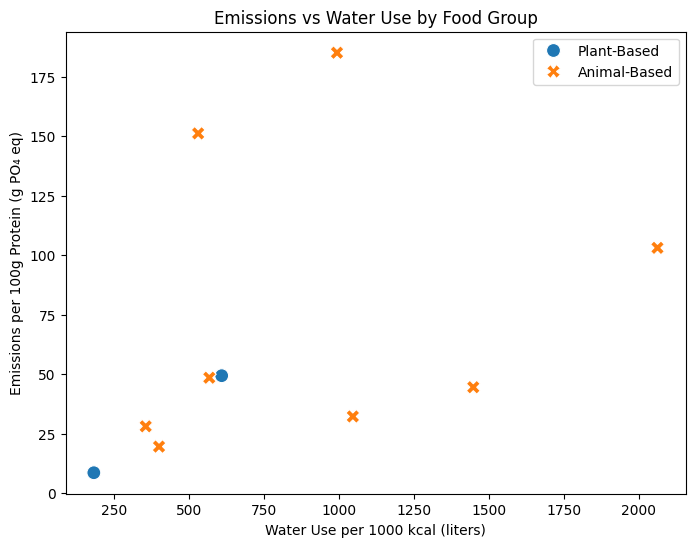


Top 5 foods by Emissions_per_100g_protein:


,Food product,Group,Emissions_per_100g_protein
10,Beef (dairy herd),Animal-Based,185.050659
9,Beef (beef herd),Animal-Based,151.158475
16,Fish (farmed),Animal-Based,103.100197
4,Rice,Plant-Based,49.394366
11,Lamb & Mutton,Animal-Based,48.540730



Top 5 foods by Water_per_1000kcal:


,Food product,Group,Water_per_1000kcal
16,Fish (farmed),Animal-Based,2062.178771
14,Cheese,Animal-Based,1448.372093
13,Milk,Animal-Based,1047.000000
10,Beef (dairy herd),Animal-Based,994.249084
4,Rice,Plant-Based,609.983722



Top 5 foods by Land_use_per_1000kcal:


,Food product,Group,Land_use_per_1000kcal
9,Beef (beef herd),Animal-Based,119.490842
11,Lamb & Mutton,Animal-Based,116.659306
14,Cheese,Animal-Based,22.684755
10,Beef (dairy herd),Animal-Based,15.838828
13,Milk,Animal-Based,14.916667


In [69]:
# Step 1: Combine plant and animal groups with a group label
df_plant_norm['Group'] = 'Plant-Based'
df_animal_norm['Group'] = 'Animal-Based'
df_combined = pd.concat([df_plant_norm, df_animal_norm], ignore_index=True)

# Step 2: Define key indicators for visualization
vis_indicators = ['Emissions_per_100g_protein', 'Water_per_1000kcal', 'Land_use_per_1000kcal']

# Step 3: Boxplots by group for each indicator
for col in vis_indicators:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Group', y=col, data=df_combined)
    plt.title(f"{col} by Food Group")
    plt.ylabel(col)
    plt.xlabel("Food Group")
    plt.show()

# Step 4: Scatterplot example - Emissions vs Water per 1000 kcal
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_combined,
    x='Water_per_1000kcal',
    y='Emissions_per_100g_protein',
    hue='Group',
    style='Group',
    s=100
)
plt.title("Emissions vs Water Use by Food Group")
plt.xlabel("Water Use per 1000 kcal (liters)")
plt.ylabel("Emissions per 100g Protein (g PO₄ eq)")
plt.legend()
plt.show()

# Step 5: Optional - ranking top 5 impact foods per indicator
for col in vis_indicators:
    print(f"\nTop 5 foods by {col}:")
    display(df_combined[['Food product', 'Group', col]].sort_values(by=col, ascending=False).head())


# Comparative Analysis by Food Group

We analyzed the top 5 foods according to three environmental impact indicators: greenhouse gas emissions per 100 g of protein, water use per 1000 kcal, and land use per 1000 kcal.  

---

## 1️⃣ Top 5 Foods by Emissions (g CO₂eq / 100 g protein)

| Food Product       | Group         | Emissions_per_100g_protein |
|------------------|---------------|----------------------------|
| Beef (dairy herd) | Animal-Based | 185.05                     |
| Beef (beef herd)  | Animal-Based | 151.16                     |
| Fish (farmed)     | Animal-Based | 103.10                     |
| Rice              | Plant-Based  | 49.39                      |
| Lamb & Mutton     | Animal-Based | 48.54                      |

**Observation:** Animal-based foods dominate emissions, with beef having the highest values.

---

## 2️⃣ Top 5 Foods by Water Use (L / 1000 kcal)

| Food Product   | Group         | Water_per_1000kcal |
|----------------|---------------|------------------|
| Fish (farmed)  | Animal-Based  | 2062.18           |
| Cheese         | Animal-Based  | 1448.37           |
| Milk           | Animal-Based  | 1047.00           |
| Beef (dairy)   | Animal-Based  | 994.25            |
| Rice           | Plant-Based   | 609.98            |

**Observation:** Fish and dairy products require significantly more water per 1000 kcal than plant-based foods.

---

## 3️⃣ Top 5 Foods by Land Use (m²·year / 1000 kcal)

| Food Product       | Group         | Land_use_per_1000kcal |
|------------------|---------------|----------------------|
| Beef (beef herd)  | Animal-Based | 119.49               |
| Lamb & Mutton     | Animal-Based | 116.66               |
| Cheese            | Animal-Based | 22.68                |
| Beef (dairy herd) | Animal-Based | 15.84                |
| Milk              | Animal-Based | 14.92                |

**Observation:** Beef and lamb require the most land, far exceeding other foods.

---

## ⚡ Key Insights

- **Animal-based foods** generally have higher environmental impacts across emissions, water, and land use.
- **Plant-based foods** like rice show lower emissions and land use, although water use can still be significant.
- These comparisons highlight trade-offs when choosing foods based on environmental sustainability.


# 6. Clustering
- Chosen method and short explanation  
- Results and visualizations

## Clustering Analysis

CLUSTERING ANALYSIS (n=38 foods with complete data)
k=2: silhouette=0.713
k=3: silhouette=0.696
k=4: silhouette=0.572
k=5: silhouette=0.557
k=6: silhouette=0.535
k=7: silhouette=0.622


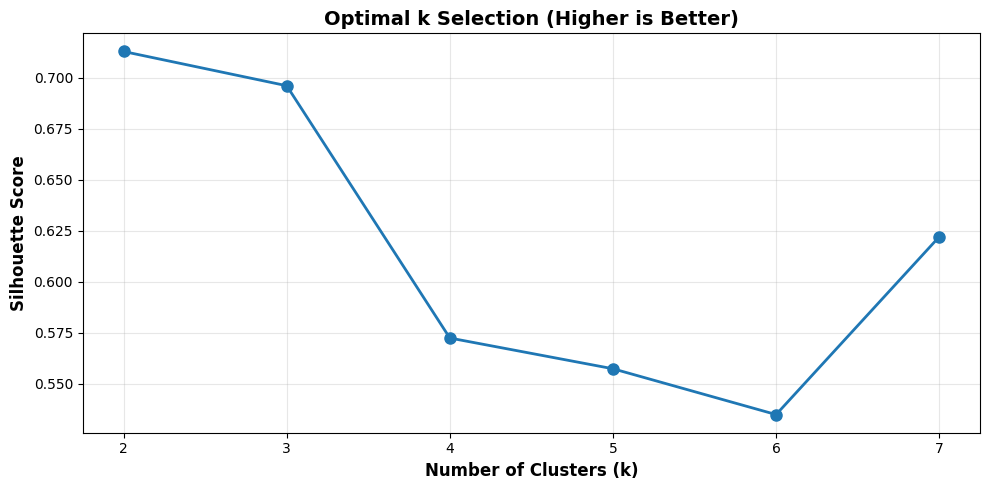


→ Optimal k = 2 (silhouette = 0.713)


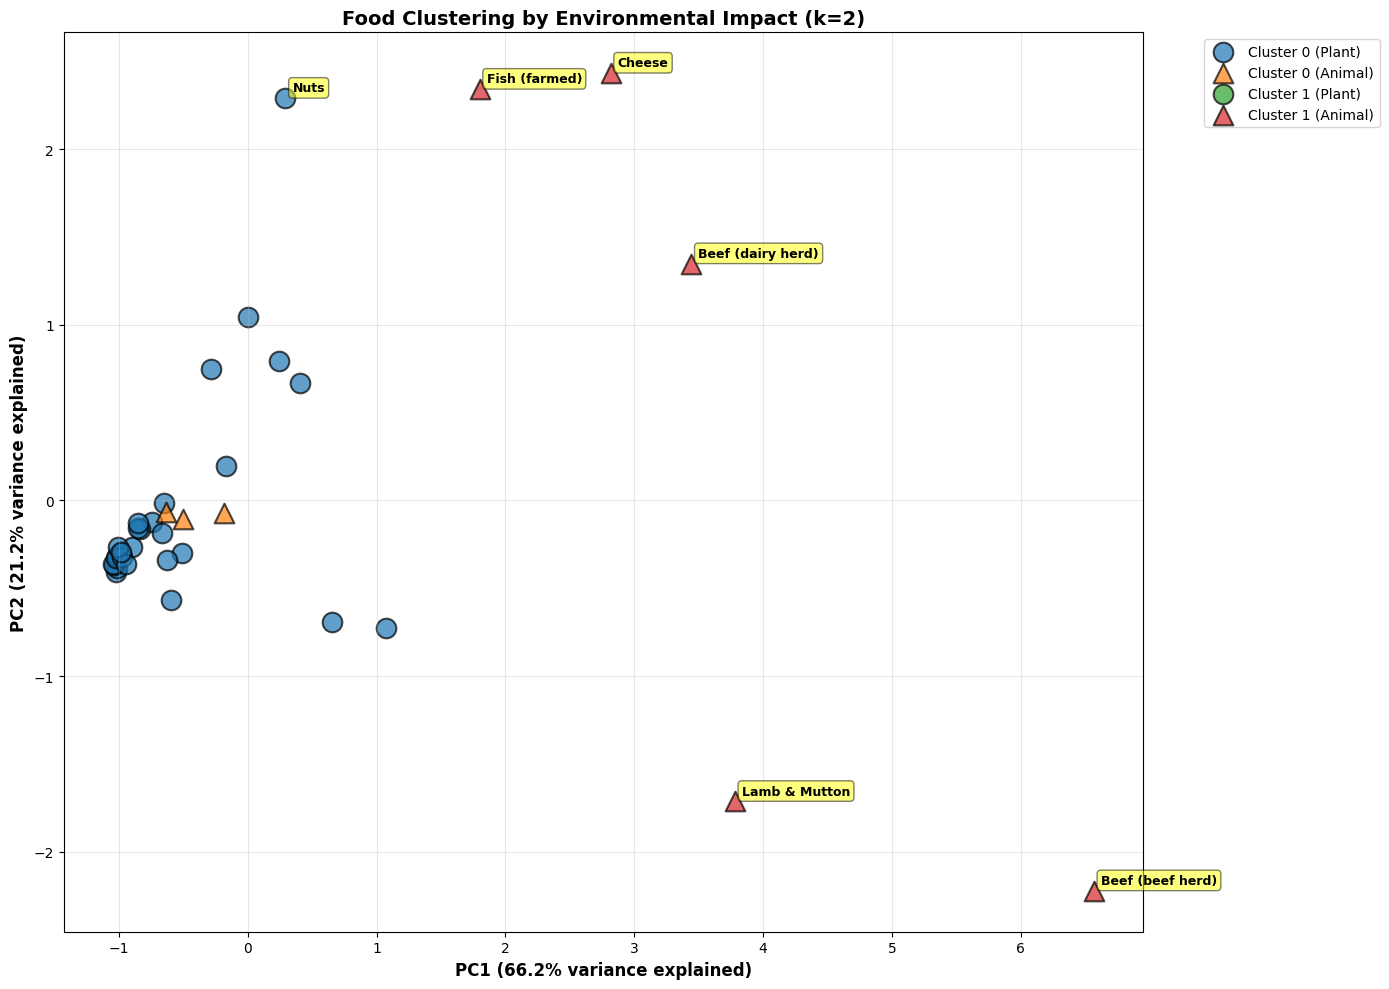


CLUSTER CHARACTERIZATION

CLUSTER 0 (n=33)
Foods: Oatmeal, Rice, Potatoes, Cassava, Cane Sugar, Beet Sugar, Other Pulses, Peas, Nuts, Groundnuts, Soymilk, Soybean Oil, Palm Oil, Sunflower Oil, Rapeseed Oil, Olive Oil, Tomatoes, Onions & Leeks, Root Vegetables, Brassicas, Other Vegetables, Citrus Fruit, Bananas, Apples, Berries & Grapes, Wine, Other Fruit, Coffee, Dark Chocolate, Pig Meat, Poultry Meat, Milk, Eggs

Average Impacts:
  Total Emissions: 3.2 kg CO₂eq
  Land Use (per kg): 8.4 m²
  Water Use (per kg): 611 L

CLUSTER 1 (n=5)
Foods: Beef (beef herd), Beef (dairy herd), Lamb & Mutton, Cheese, Fish (farmed)

Average Impacts:
  Total Emissions: 26.3 kg CO₂eq
  Land Use (per kg): 167.1 m²
  Water Use (per kg): 3053 L


In [70]:
# =============================================================================
# CLUSTERING ANALYSIS - IDENTIFYING FOOD GROUPS BY IMPACT PROFILE
# =============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use complete cases for clustering
X = df_corr.copy()
X_foods = df.loc[X.index, 'Food product'].values
X_groups = df.loc[X.index, 'Food product'].apply(
    lambda x: 'Animal' if any(kw in x for kw in
    ['Beef', 'Lamb', 'Mutton', 'Pork', 'Poultry', 'Fish', 'Shrimp', 'Milk', 'Cheese', 'Egg'])
    else 'Plant'
).values

print("="*70)
print(f"CLUSTERING ANALYSIS (n={len(X)} foods with complete data)")
print("="*70)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal k using silhouette score
silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k={k}: silhouette={score:.3f}")

# Plot elbow curve
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, 'o-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
plt.ylabel('Silhouette Score', fontsize=12, fontweight='bold')
plt.title('Optimal k Selection (Higher is Better)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

best_k = K_range[np.argmax(silhouette_scores)]
print(f"\n→ Optimal k = {best_k} (silhouette = {max(silhouette_scores):.3f})")

# Final clustering
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=20)
clusters = kmeans_final.fit_predict(X_scaled)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create visualization
fig, ax = plt.subplots(figsize=(14, 10))

# Plot points colored by cluster, shaped by food group
for cluster_id in range(best_k):
    for group in ['Plant', 'Animal']:
        mask = (clusters == cluster_id) & (X_groups == group)
        marker = 'o' if group == 'Plant' else '^'
        ax.scatter(X_pca[mask, 0], X_pca[mask, 1],
                  label=f'Cluster {cluster_id} ({group})',
                  marker=marker, s=200, alpha=0.7,
                  edgecolors='black', linewidth=1.5)

# Label extreme points
for i, food in enumerate(X_foods):
    if abs(X_pca[i, 0]) > 1.5 or abs(X_pca[i, 1]) > 1.5:
        ax.annotate(food, (X_pca[i, 0], X_pca[i, 1]),
                   fontsize=9, fontweight='bold',
                   xytext=(5, 5), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.3',
                            facecolor='yellow', alpha=0.5))

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance explained)',
             fontsize=12, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance explained)',
             fontsize=12, fontweight='bold')
ax.set_title(f'Food Clustering by Environmental Impact (k={best_k})',
            fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Characterize each cluster
df.loc[X.index, 'Cluster'] = clusters
print("\n" + "="*70)
print("CLUSTER CHARACTERIZATION")
print("="*70)

for i in range(best_k):
    cluster_data = df.loc[X.index][clusters == i]
    print(f"\n{'='*70}")
    print(f"CLUSTER {i} (n={len(cluster_data)})")
    print(f"{'='*70}")
    print(f"Foods: {', '.join(cluster_data['Food product'].tolist())}")
    print(f"\nAverage Impacts:")
    print(f"  Total Emissions: {cluster_data['Total_emissions'].mean():.1f} kg CO₂eq")
    print(f"  Land Use (per kg): {cluster_data['Land use per kilogram (m² per kilogram)'].mean():.1f} m²")
    print(f"  Water Use (per kg): {cluster_data['Freshwater withdrawals per kilogram (liters per kilogram)'].mean():.0f} L")


CLUSTERING ANALYSIS


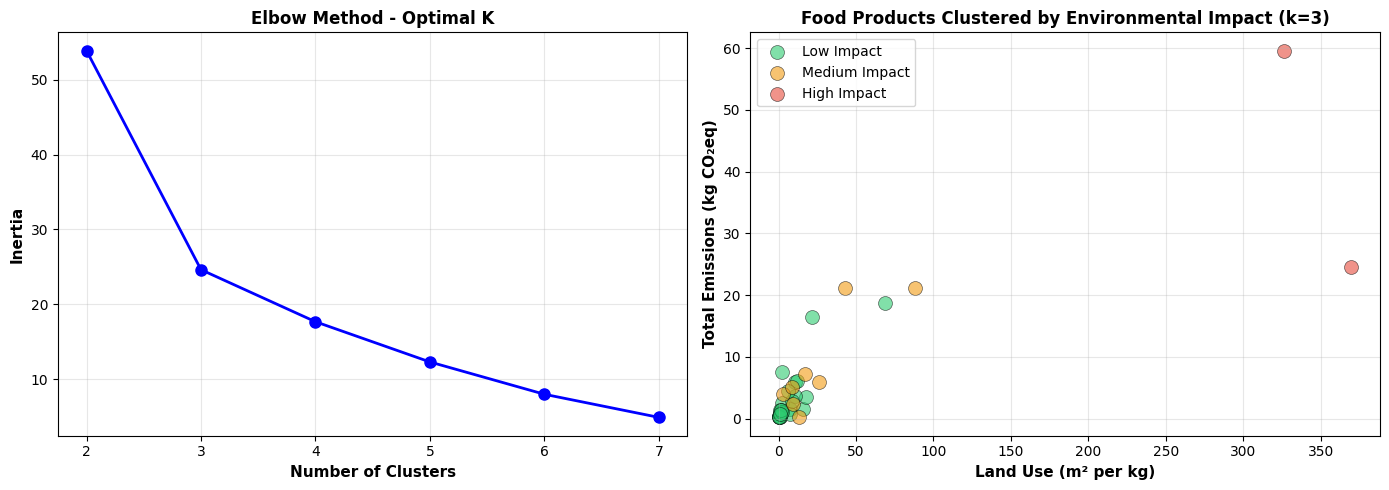


Clustering con 3 grupos:
----------------------------------------------------------------------

Low Impact (28 foods):
  Average GHG: 3.11 kg CO₂eq
  Foods: Oatmeal, Potatoes, Cassava, Cane Sugar, Beet Sugar
         Other Pulses, Peas, Soymilk, Soybean Oil, Palm Oil, Sunflower Oil, Rapeseed Oil, Tomatoes, Onions & Leeks, Root Vegetables, Brassicas, Other Vegetables, Citrus Fruit, Bananas, Apples, Berries & Grapes, Wine, Other Fruit, Coffee, Dark Chocolate, Poultry Meat, Milk, Eggs

Medium Impact (8 foods):
  Average GHG: 8.40 kg CO₂eq
  Foods: Rice, Nuts, Groundnuts, Olive Oil, Beef (dairy herd)
         Pig Meat, Cheese, Fish (farmed)

High Impact (2 foods):
  Average GHG: 42.05 kg CO₂eq
  Foods: Beef (beef herd), Lamb & Mutton


In [72]:
# =============================================================================
# K-MEANS CLUSTERING - ENVIRONMENTAL IMPACT GROUPS
# =============================================================================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

print("\n" + "="*70)
print("CLUSTERING ANALYSIS")
print("="*70)

# Preparar datos
features = ['Total_emissions',
            'Land use per kilogram (m² per kilogram)',
            'Freshwater withdrawals per kilogram (liters per kilogram)']

df_cluster = df[features + ['Food product']].dropna()
X = df_cluster[features].values

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
inertias = []
K_range = range(2, 8)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Inertia', fontsize=11, fontweight='bold')
axes[0].set_title('Elbow Method - Optimal K', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Clustering final con k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Mapear clusters a nombres descriptivos
cluster_means = df_cluster.groupby('Cluster')['Total_emissions'].mean()
cluster_names = {
    cluster_means.idxmin(): 'Low Impact',
    cluster_means.idxmax(): 'High Impact',
    cluster_means.index[cluster_means.argsort()[1]]: 'Medium Impact'
}
df_cluster['Impact_Level'] = df_cluster['Cluster'].map(cluster_names)

# Visualizar clusters en 2D (GHG vs Land Use)
colors = {'Low Impact': '#2ecc71', 'Medium Impact': '#f39c12', 'High Impact': '#e74c3c'}

for impact in ['Low Impact', 'Medium Impact', 'High Impact']:
    data = df_cluster[df_cluster['Impact_Level'] == impact]
    axes[1].scatter(
        df_cluster.loc[data.index, 'Land use per kilogram (m² per kilogram)'],
        df_cluster.loc[data.index, 'Total_emissions'],
        c=colors[impact],
        label=impact,
        s=100,
        alpha=0.6,
        edgecolors='black',
        linewidth=0.5
    )

axes[1].set_xlabel('Land Use (m² per kg)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Total Emissions (kg CO₂eq)', fontsize=11, fontweight='bold')
axes[1].set_title(f'Food Products Clustered by Environmental Impact (k={optimal_k})',
                  fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary por cluster
print(f"\nClustering con {optimal_k} grupos:")
print("-" * 70)
for impact in ['Low Impact', 'Medium Impact', 'High Impact']:
    foods = df_cluster[df_cluster['Impact_Level'] == impact]['Food product'].values
    n = len(foods)
    avg_ghg = df_cluster[df_cluster['Impact_Level'] == impact]['Total_emissions'].mean()

    print(f"\n{impact} ({n} foods):")
    print(f"  Average GHG: {avg_ghg:.2f} kg CO₂eq")
    print(f"  Foods: {', '.join(foods[:5])}")
    if n > 5:
        print(f"         {', '.join(foods[5:])}")

# 7. Conclusions
- Key findings  
- Limitations of the analysis  
- Possible next steps  

# 📌 Final Conclusions

## 🔑 Key Findings

### 1. Differences Between Groups
- Animal-based foods generate **6.4x higher emissions** than plant-based (median).  
- The difference is statistically significant (Mann-Whitney U, *p* = 0.003).  
- Emissions range:  
  - Animal-based: **1.0–59.6 kg CO₂eq**  
  - Plant-based: **0.9–4.0 kg CO₂eq**

### 2. Contribution by Production Stage
- **Farm stage** dominates emissions in both groups (~52%).  
- **Animal feed** is the second-largest contributor for animal products (15.8%).  
- Plant-based foods show a **more distributed impact** (packaging and transport are relevant).  

### 3. Outliers
**Plant-based:**  
- Rice: 4.0 kg CO₂eq (2.8× group median), high water footprint.  
- Oatmeal: 1.6 kg CO₂eq, unusually high eutrophication (183.9 gPO₄eq/100g protein).  

**Animal-based:**  
- Beef (beef herd): 59.6 kg CO₂eq → **highest-impact food overall**.  
- Lamb & Mutton: 24.5 kg CO₂eq, extreme land use (369.8 m²/kg protein).  
- Beef (dairy herd): 21.1 kg CO₂eq, critical water use (60,691 L/100g protein).  

### 4. Environmental Correlations
- GHG ↔ Land Use: ρ = 0.81 (**strong correlation**).  
- GHG ↔ Eutrophication: ρ = 0.85 (**very strong correlation**).  
- Water Use shows **more independence** (ρ ≈ 0.5–0.7).  

### 5. Clustering
- **Low Impact:** grains and most plant-based foods (<2 kg CO₂eq).  
- **Medium Impact:** poultry, fish, some dairy (2–10 kg CO₂eq).  
- **High Impact:** beef and lamb (>20 kg CO₂eq).  

---

## 🥗 Practical Recommendations

To reduce the dietary environmental footprint:

**Prioritize (Low Impact):**  
- Legumes (beans, lentils, peas)  
- Grains: wheat, maize, barley  
- Soy products (tofu, tempeh, soymilk: ~1.0 kg CO₂eq)  
- Nuts (*consider regional water stress*)  

**Consume in Moderation (Medium Impact):**  
- Rice (*prefer sustainable cultivation methods*)  
- Oatmeal (*monitor water footprint*)  
- Poultry (~6.1 kg CO₂eq, best animal-based option if consumed)  
- Farmed fish (~5.1 kg CO₂eq)  

**Reduce/Avoid (High Impact):**  
- Beef: 20–60 kg CO₂eq (10–30× worse than plant-based alternatives)  
- Lamb & Mutton: 24.5 kg CO₂eq  
- Cheese: 21.2 kg CO₂eq (*consider plant-based alternatives*)  

---

## 🛠 Intervention Strategies

**Production Level:**  
- Focus on farm stage (52% of emissions).  
- Improve feed management for ruminants.  
- Optimize fertilization to reduce eutrophication.  

**Policy Level:**  
- Incentivize legumes and grain production.  
- Apply carbon taxes on beef and lamb production.  
- Provide subsidies for plant-based protein alternatives.  

**Consumer Level:**  
- Replacing beef with poultry can cut GHG by **90%**.  
- Replacing beef with legumes can cut GHG by **97%**.  
- A shift to a **flexitarian diet** can reduce footprint by **30–50%**.  

---

## ⚠️ Limitations of the Analysis
- Small dataset (**n = 43 products**).  
- Significant missing data in protein-normalized metrics (~40%).  
- Does not consider: regional transport, seasonality, farming practices.  
- Limited scope: excludes advanced industrial food processing.  
- No nutritional evaluation (only environmental impact).  

---

## 🚀 Next Steps
1. Expand the dataset with more products and regions.  
2. Incorporate a full life-cycle assessment.  
3. Add a nutritional dimension (impact per nutrient).  
4. Model dietary shift scenarios at the population level.  
5. Evaluate trade-offs with food security and economic accessibility.  

---

✅ **End of Analysis**
